In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import datetime
import pymongo
from pymongo import MongoClient
import datetime as dt

In [2]:
# MONGO_HOST = "13.127.94.116"
MONGO_DB = "ReceptionFB"

client = MongoClient('localhost', 52838)
db = client[MONGO_DB]

In [3]:
# db= client.ReceptionFB

In [3]:
df = pd.DataFrame(list(db.pageDetails.find({}, {"_id":False})))

In [4]:
df.tail()

,date,device,page
2229,2018-06-21 12:46:03.454,GroundFloorLela,redbus
2230,2018-06-21 15:35:58.724,GroundFloorLela,You are here Clicked
2231,2018-06-21 15:36:04.335,GroundFloorLela,Location Clicked
2232,2018-06-21 15:36:08.509,GroundFloorLela,
2233,2018-06-22 05:43:35.372,6thFloorLeelaWashroom,Company Clicked


In [6]:
df2=df.copy()

In [7]:
for i in range(0, len(df2)):
    if df2.iloc[i][1]=='washroom':
        df2.iloc[i,1]='6thFloorLeelaWashroom'
        

In [8]:
df2=df2[df2.device!='Missing Type File']

In [9]:
df2.device.value_counts()

GroundFloorLela          1087
6thFloorLeelaWashroom    1081
leela6thfloor               1
Name: device, dtype: int64

In [11]:
df2['date']=df2['date']+dt.timedelta(minutes=330)
x=df2['date'].dt.strftime('%d-%m-%Y %H:%M:%S')

In [12]:
a=[]
for i in x:
    a.append(i.split())
y=np.array(a)

In [13]:
df2['date']=y[:,0]
df2['TIME']=y[:,1]

In [14]:
df2['date']=df2['date'].apply(lambda x: dt.datetime.strptime(x, "%d-%m-%Y").date())
df2['TIME']=df2['TIME'].apply(lambda x: dt.datetime.strptime(x, "%H:%M:%S").time())
df2.tail()

,date,device,page,TIME
2228,2018-06-21,GroundFloorLela,,18:15:57
2229,2018-06-21,GroundFloorLela,redbus,18:16:03
2230,2018-06-21,GroundFloorLela,You are here Clicked,21:05:58
2231,2018-06-21,GroundFloorLela,Location Clicked,21:06:04
2232,2018-06-21,GroundFloorLela,,21:06:08


In [15]:
df2=df2[['date', 'TIME', 'device', 'page']]

In [16]:
df2.head()

,date,TIME,device,page
0,2018-05-31,10:31:58,GroundFloorLela,FeedBack Clicked
1,2018-05-31,10:33:47,GroundFloorLela,
2,2018-05-31,10:33:49,GroundFloorLela,cleo
3,2018-05-31,10:42:26,GroundFloorLela,
4,2018-05-31,10:42:30,GroundFloorLela,saifpartner


In [37]:
df3=pd.DataFrame()
for val in df2.groupby(by="page"):
    data={'page':val[0], 'count':int(len(val[1]))}
    df3 = df3.append(data, ignore_index=True)
df3.head()


,count,page
0,424.0,
1,12.0,About Button Clicked
2,14.0,Cafe Clicked
3,7.0,Comming Soon Clicked
4,124.0,Company Clicked


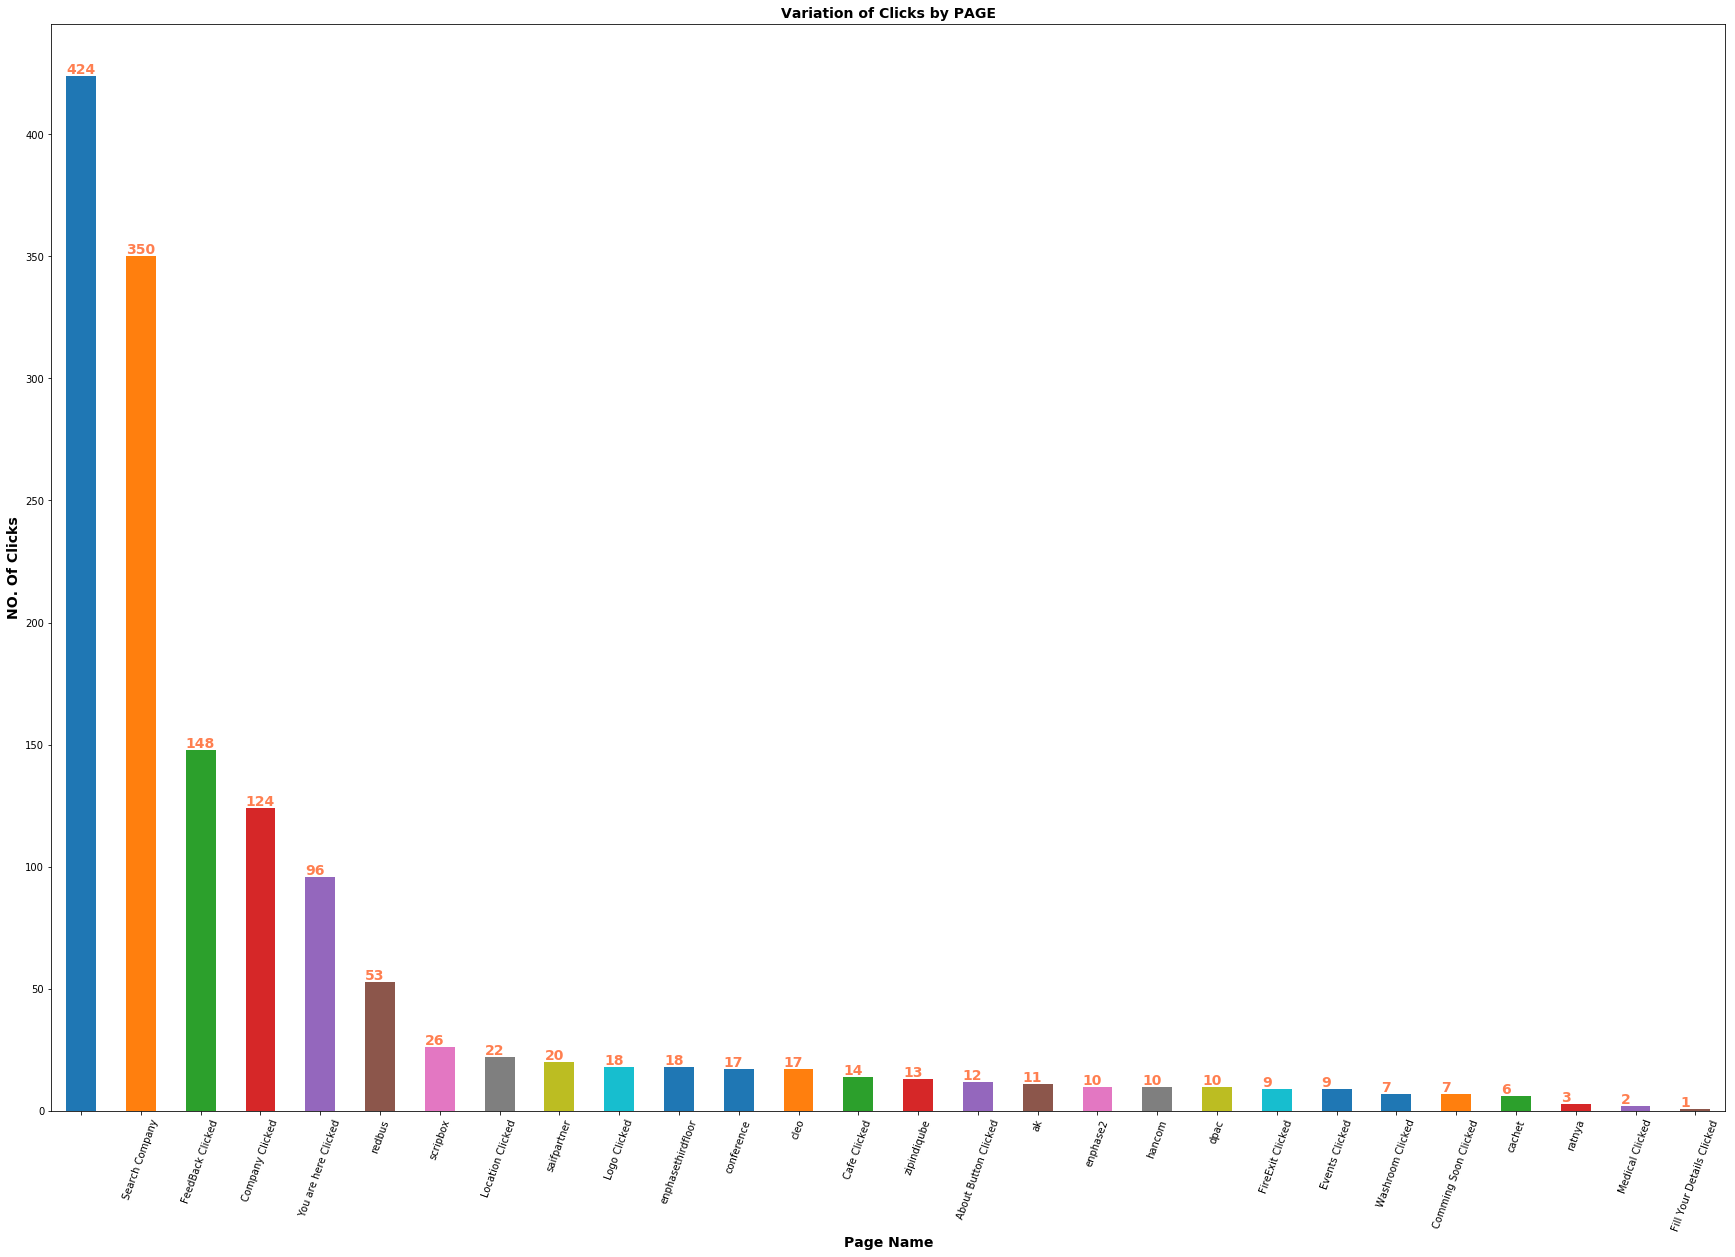

In [75]:
# df3=df3.sort_values(by=["count"],ascending=False)
# ax=df3.plot(x='page', y='count', kind='bar', figsize=(30,20), rot=70)

ax=df2['page'].value_counts().plot(kind='bar', figsize=(30, 20), rot=70)
ax.set_ylabel("NO. Of Clicks", fontsize=14, fontweight='bold')
ax.set_xlabel("Page Name", fontsize=14, fontweight='bold')
ax.set_title("Variation of Clicks by PAGE", fontsize=14, fontweight='bold')
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1, str(i.get_height()), fontsize=14, color='coral', fontweight='bold')
plt.savefig("test1.pdf", bbox_inches='tight')

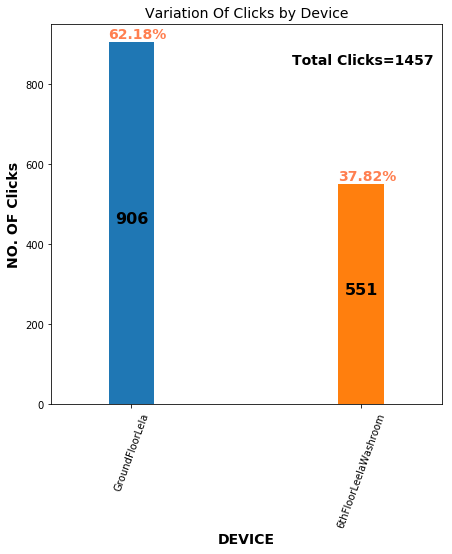

In [76]:
ax2=df2.device.value_counts().plot(kind='bar', figsize=(7, 7), rot=70, width=0.2)
ax2.set_xlabel("DEVICE", fontsize=14, fontweight='bold')
ax2.set_ylabel("NO. OF Clicks", fontsize=14, fontweight='bold')
ax2.set_title("Variation Of Clicks by Device", fontsize=14)
ax2.text(0.7, 850, 'Total Clicks='+str(len(df2)), fontsize=14, fontweight='bold')
for i in ax2.patches:
    ax2.text(i.get_x(), i.get_height()+8, str(round((i.get_height()/len(df2))*100, 2))+'%', fontsize=14, color='coral', fontweight='bold')
    ax2.text(i.get_x()+0.03, i.get_height()/2, str(i.get_height()), fontsize=16, color='black', fontweight='bold')
plt.savefig("test2.pdf", bbox_inches='tight')

In [ ]:
# df2.to_excel("new_file.xlsx")

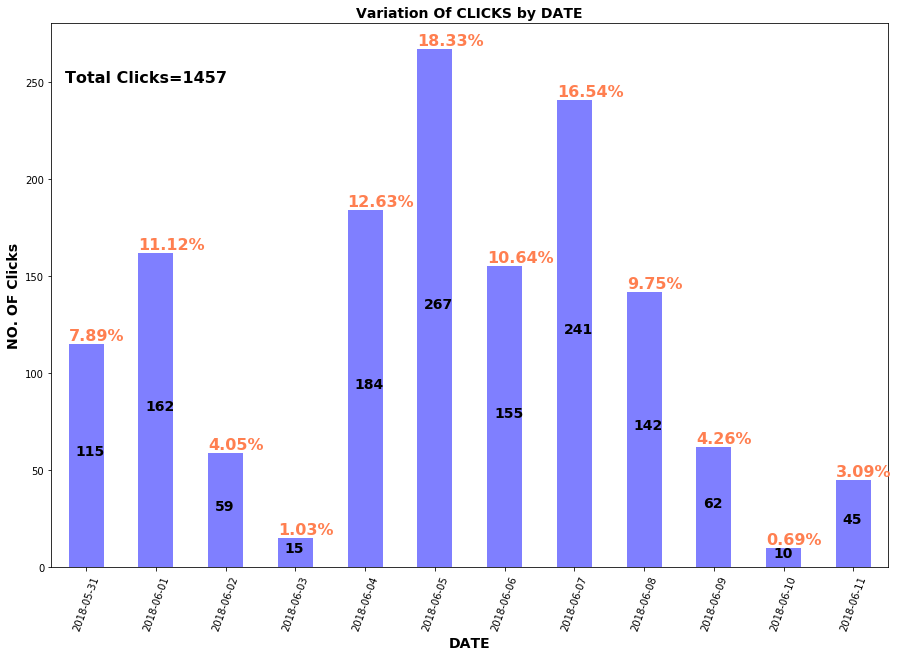

In [77]:
ax4=df2.groupby('date').device.count().plot(kind='bar', figsize=(15,10), color='blue', alpha=0.5, rot=70)
ax4.set_xlabel("DATE", fontsize=14, fontweight='bold')
ax4.set_ylabel("NO. OF Clicks", fontsize=14, fontweight='bold')
ax4.set_title("Variation Of CLICKS by DATE",fontsize=14, fontweight='bold')
ax4.text(-0.3, 250, 'Total Clicks='+str(len(df2)),  fontsize=16, color='black', fontweight='bold' )
for i in ax4.patches:
    ax4.text(i.get_x()+0.1, i.get_height()/2, str(i.get_height()),  fontsize=14, color='black', fontweight='bold' )
    ax4.text(i.get_x(), i.get_height()+2, str(round(i.get_height()/len(df2)*100, 2))+'%',  fontsize=16, color='coral', fontweight='bold')
plt.savefig("test3.pdf", bbox_inches='tight')

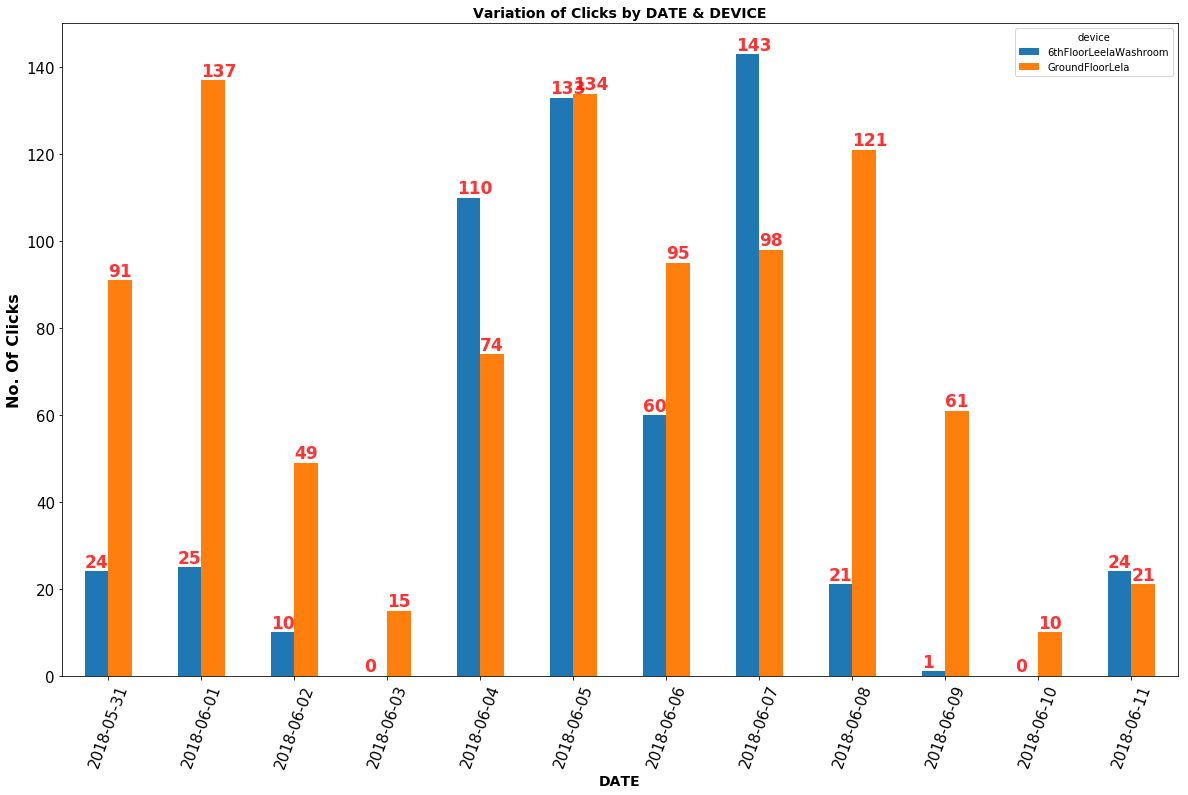

In [78]:
df4=df2.groupby('date').device.value_counts()
ax3=df4.unstack(1).plot(figsize=[20,12],kind='bar',fontsize=15, rot=70)
ax3.set_xlabel('DATE', fontsize=14, fontweight='bold')
ax3.set_ylabel('No. Of Clicks', fontsize=16, fontweight='bold')
ax3.set_title("Variation of Clicks by DATE & DEVICE", fontsize=14, fontweight='bold')
for i in ax3.patches:
    ax3.text(i.get_x(), i.get_height()+1, str(int(i.get_height())),fontsize=17, color='red', fontweight='bold', alpha=0.8)
plt.savefig("test4.pdf", bbox_inches='tight')

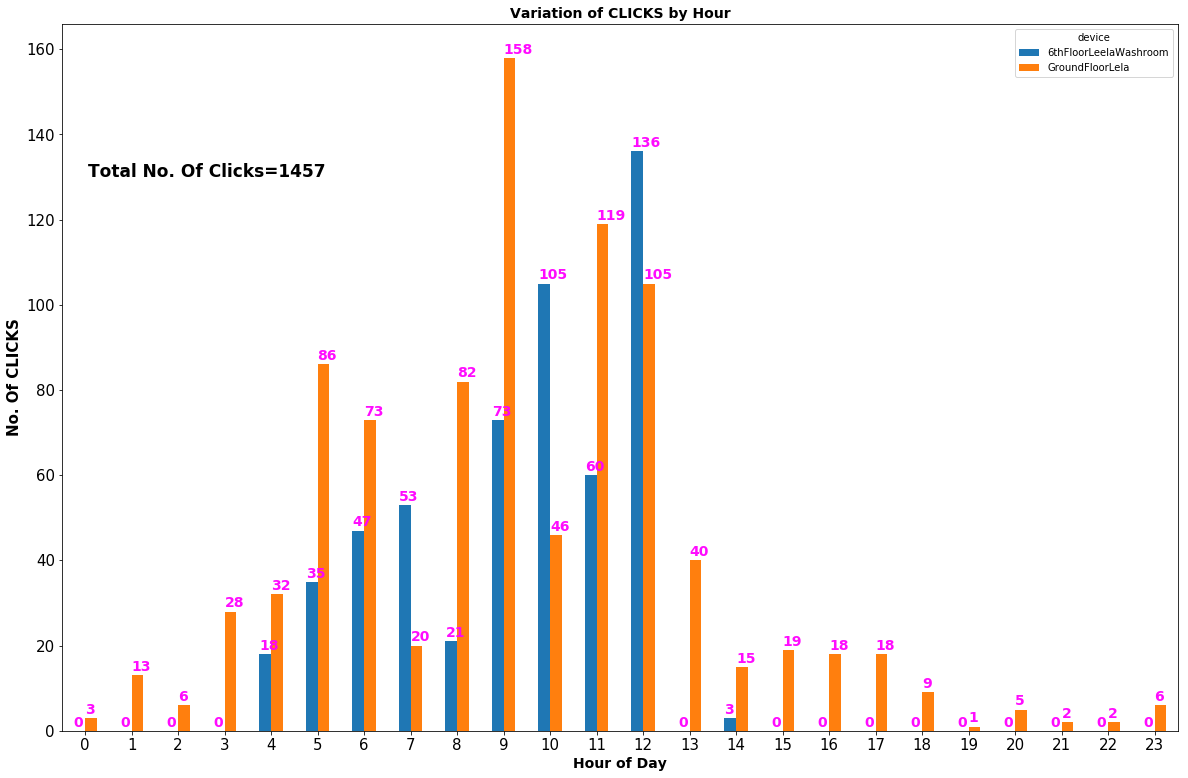

In [79]:
df2['click_Hour'] = df.date.dt.hour
ax5=df2.groupby(['device','click_Hour']).size().unstack(0).plot(figsize=[20,13],kind='bar',legend='side',fontsize=15, rot=0)
ax5.set_xlabel("Hour of Day",fontsize=14, fontweight='bold')
ax5.set_ylabel("No. Of CLICKS",fontsize=15, fontweight='bold')
ax5.set_title('Variation of CLICKS by Hour', fontsize=14, fontweight='bold')
for i in ax5.patches:
    ax5.text(i.get_x(), i.get_height()+1, str(int(i.get_height())),fontsize=14, color='magenta', fontweight='bold', alpha=12)
    
ax5.text(0.06, 130,"Total No. Of Clicks="+str(len(df2)),fontsize=17, fontweight='bold')

plt.savefig("test5.pdf", bbox_inches='tight')


# GENERATING Week Wise RESULT

In [17]:
# ------------------------GENERATING Week Wise RESULT-------------------------------------------------------------
#====================================================================================================================
#=====================================================================================================================
df3=df2[df2.date>dt.date(2018, 6, 11)]

In [18]:
df3.groupby('date').device.value_counts()

date        device               
2018-06-18  6thFloorLeelaWashroom     47
            GroundFloorLela           42
            leela6thfloor              1
2018-06-19  6thFloorLeelaWashroom    466
            GroundFloorLela           49
2018-06-20  GroundFloorLela           35
            6thFloorLeelaWashroom     14
2018-06-21  GroundFloorLela           55
            6thFloorLeelaWashroom      3
Name: device, dtype: int64

In [19]:
df3=df3[df3.device!='leela6thfloor']

In [20]:
df3.groupby('date').device.value_counts()

date        device               
2018-06-18  6thFloorLeelaWashroom     47
            GroundFloorLela           42
2018-06-19  6thFloorLeelaWashroom    466
            GroundFloorLela           49
2018-06-20  GroundFloorLela           35
            6thFloorLeelaWashroom     14
2018-06-21  GroundFloorLela           55
            6thFloorLeelaWashroom      3
Name: device, dtype: int64

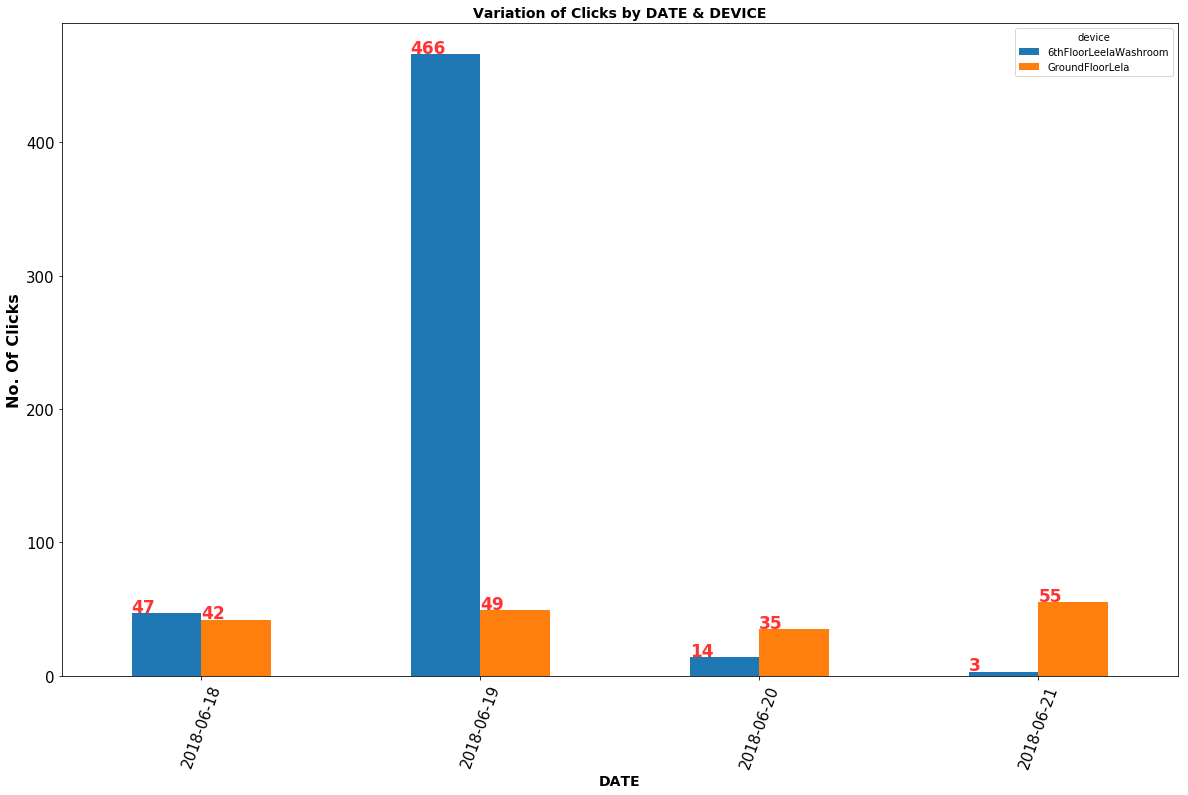

In [35]:
ax6=df3.groupby('date').device.value_counts().unstack(1).plot(figsize=[20,12],kind='bar',fontsize=15, rot=70)
ax6.set_xlabel('DATE', fontsize=14, fontweight='bold')
ax6.set_ylabel('No. Of Clicks', fontsize=16, fontweight='bold')
ax6.set_title("Variation of Clicks by DATE & DEVICE", fontsize=14, fontweight='bold')
for i in ax6.patches:
    ax6.text(i.get_x(), i.get_height()+1, str(int(i.get_height())),fontsize=17, color='red', fontweight='bold', alpha=0.8)
plt.savefig("test4.pdf", bbox_inches='tight')

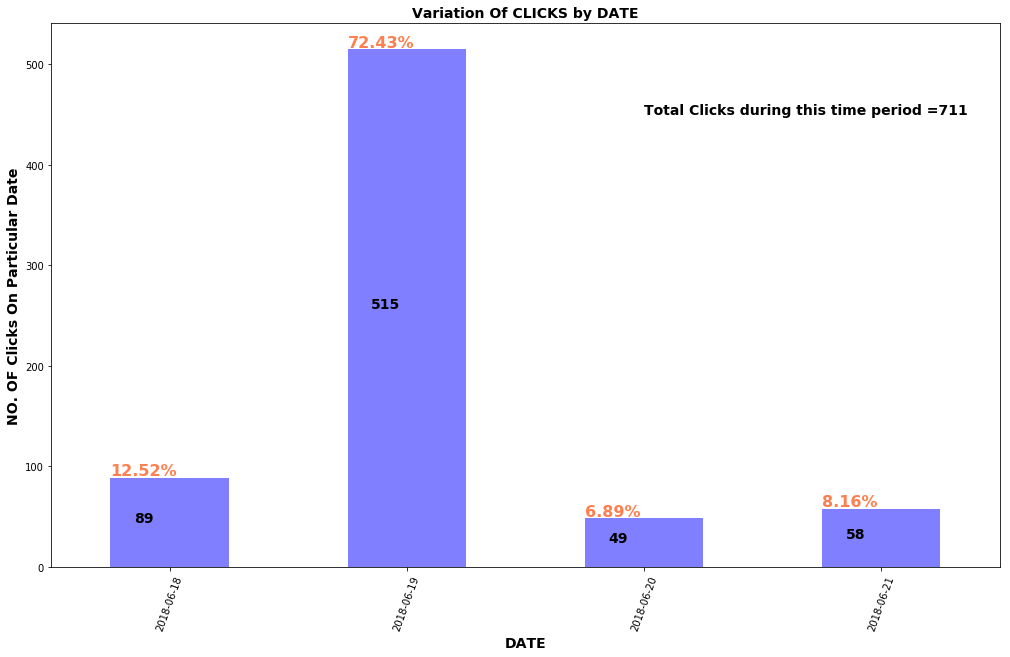

In [36]:
ax4=df3.groupby('date').device.count().plot(kind='bar', figsize=(17,10), color='blue', alpha=0.5, rot=70)
ax4.set_xlabel("DATE", fontsize=14, fontweight='bold')
ax4.set_ylabel("NO. OF Clicks On Particular Date", fontsize=14, fontweight='bold')
ax4.set_title("Variation Of CLICKS by DATE",fontsize=14, fontweight='bold')
ax4.text(2, 450, 'Total Clicks during this time period ='+str(len(df3)),  fontsize=14, color='black', fontweight='bold' )
for i in ax4.patches:
    ax4.text(i.get_x()+0.1, i.get_height()/2, str(i.get_height()),  fontsize=14, color='black', fontweight='bold' )
    ax4.text(i.get_x(), i.get_height()+2, str(round(i.get_height()/len(df3)*100, 2))+'%',  fontsize=16, color='coral', fontweight='bold')

plt.savefig("test5.pdf", bbox_inches='tight')

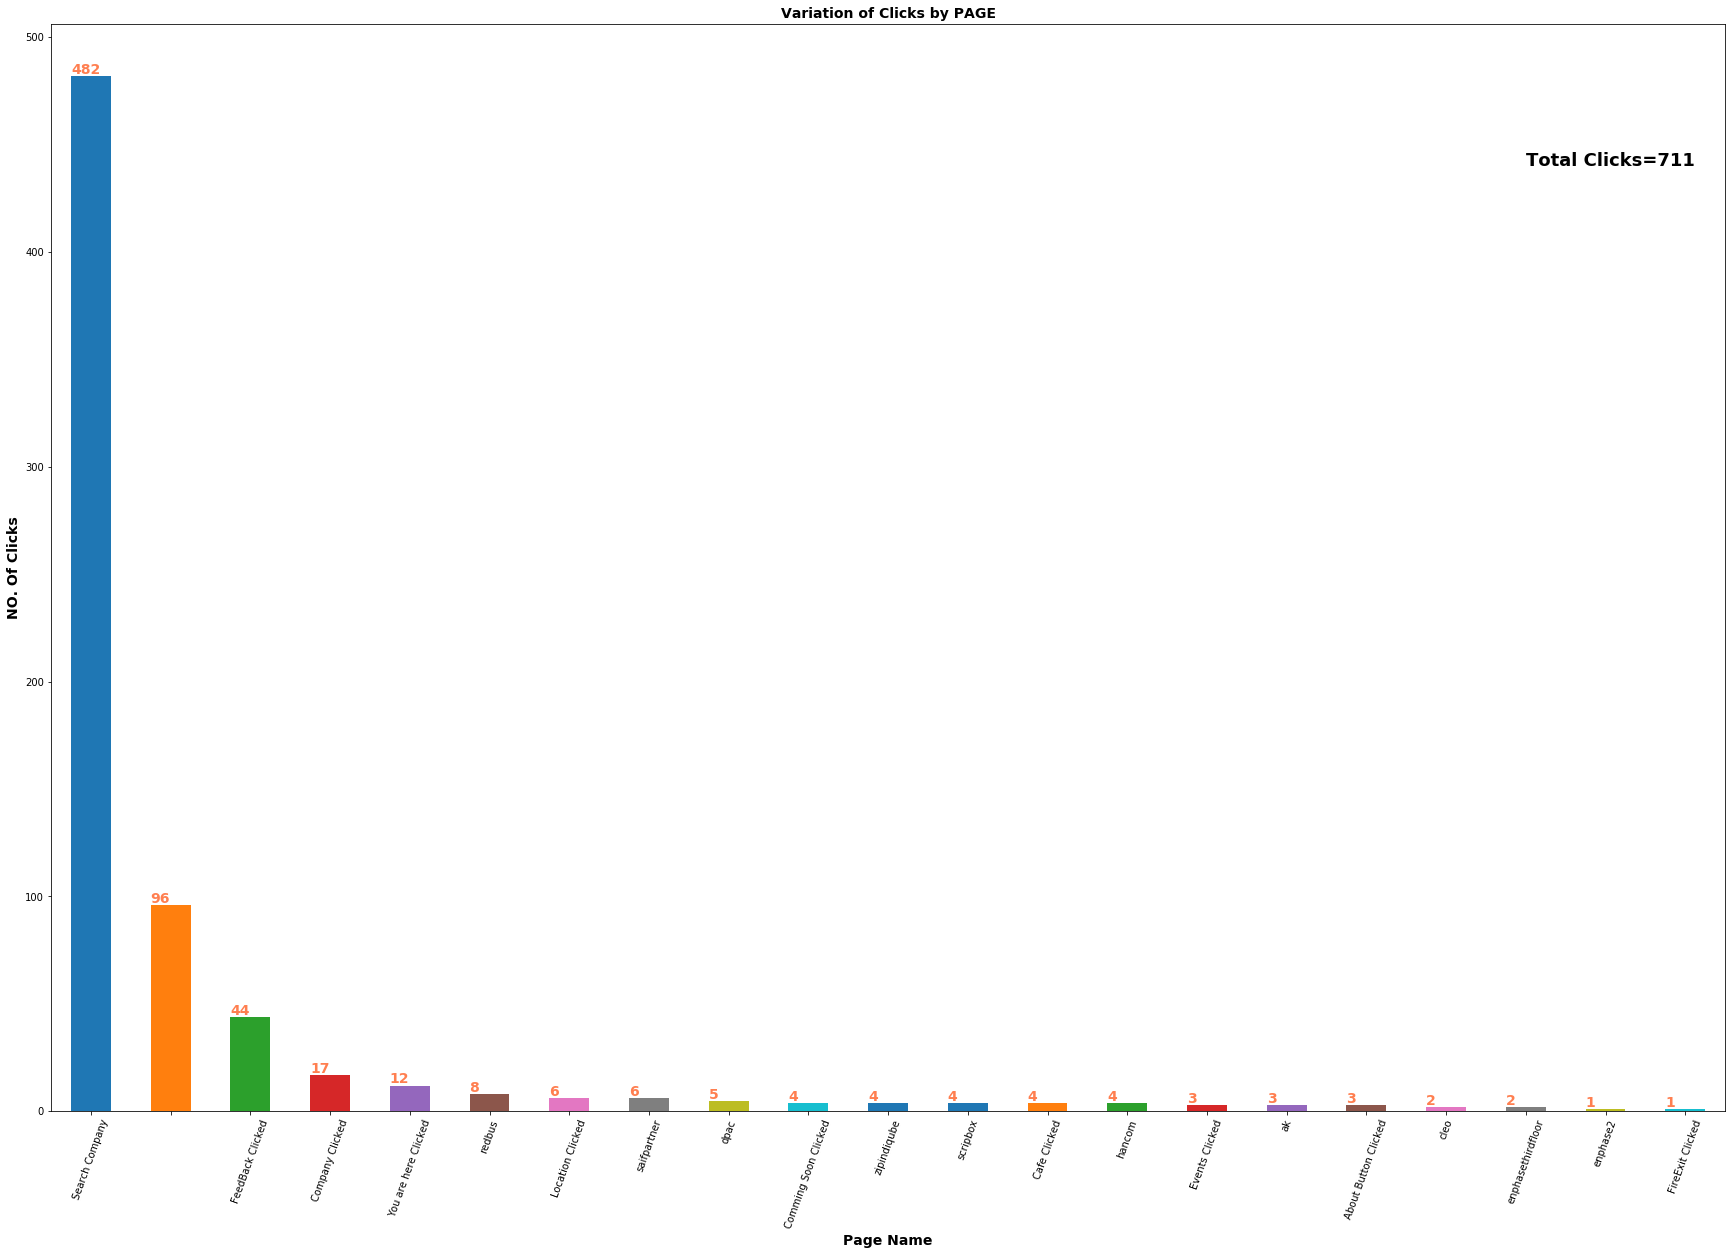

In [37]:
ax=df3['page'].value_counts().plot(kind='bar', figsize=(30, 20), rot=70)
ax.set_ylabel("NO. Of Clicks", fontsize=14, fontweight='bold')
ax.set_xlabel("Page Name", fontsize=14, fontweight='bold')
ax.set_title("Variation of Clicks by PAGE", fontsize=14, fontweight='bold')
ax.text(18, 440, 'Total Clicks='+str(len(df3)),fontsize=18, fontweight='bold')
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1, str(i.get_height()), fontsize=14, color='coral', fontweight='bold')
plt.savefig("test1.pdf", bbox_inches='tight')

In [28]:
df3.TIME=pd.to_datetime(df3.TIME, format='%H:%M:%S')

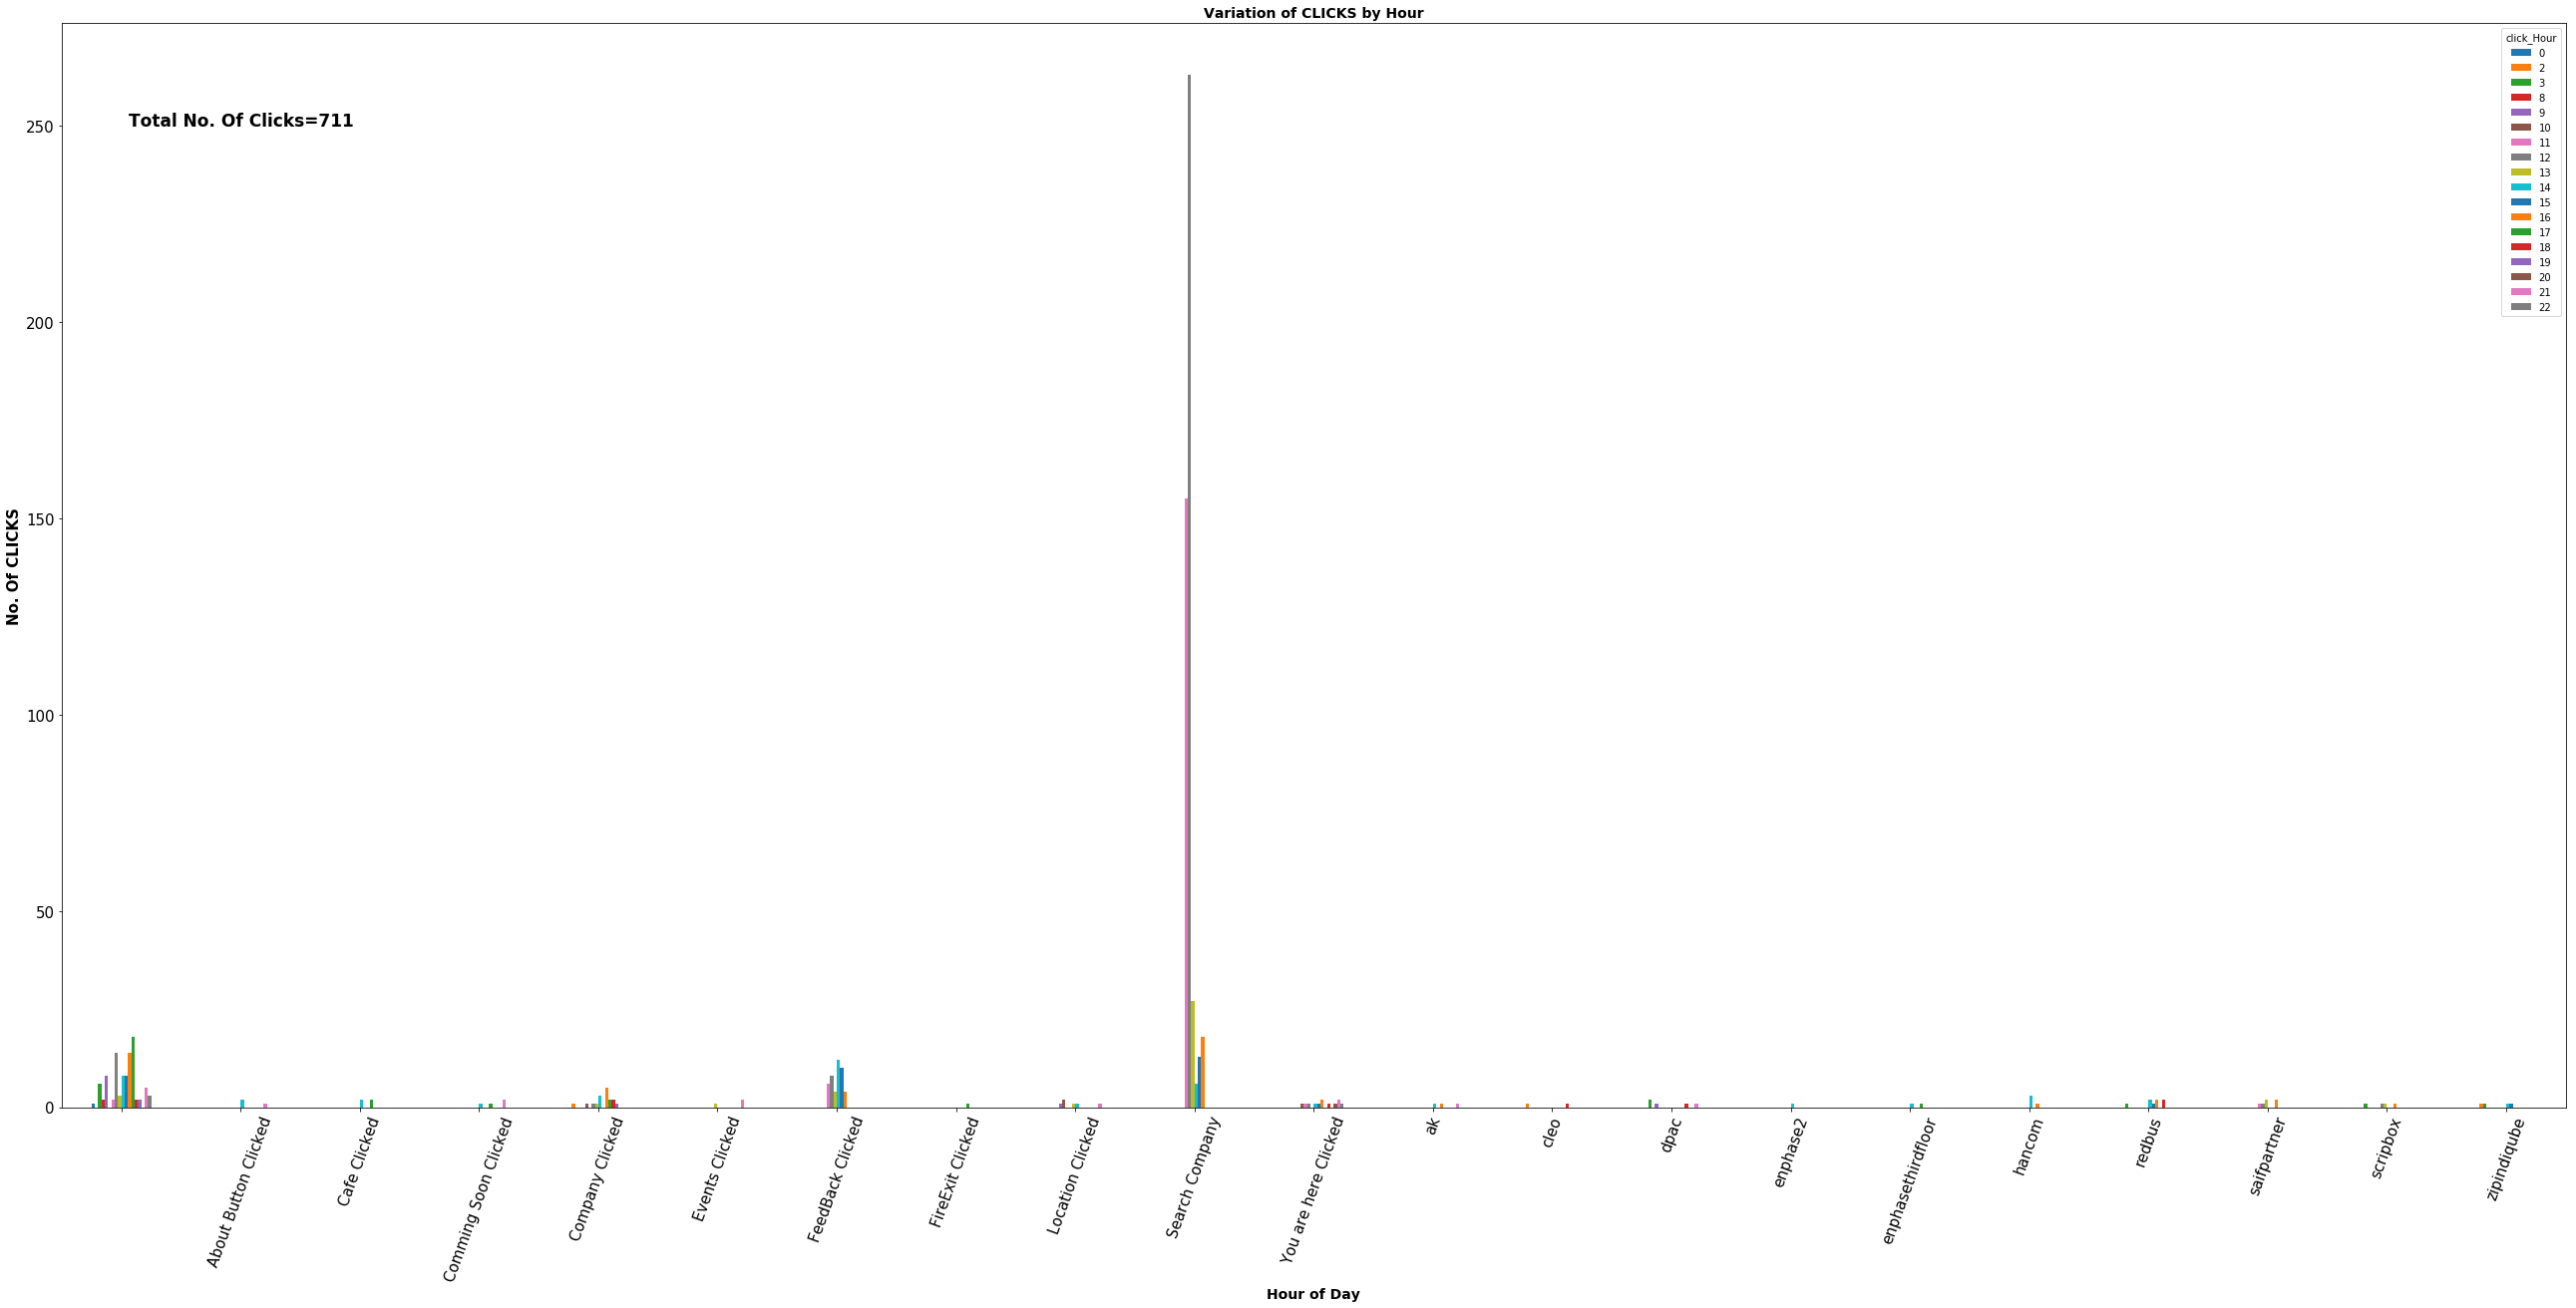

In [38]:
df3['click_Hour'] = df3.TIME.dt.hour
ax5=df3.groupby(['page','click_Hour']).size().unstack(1).plot(figsize=[45,20],kind='bar',legend='side',fontsize=15, rot=70)
ax5.set_xlabel("Hour of Day",fontsize=14, fontweight='bold')
ax5.set_ylabel("No. Of CLICKS",fontsize=15, fontweight='bold')
ax5.set_title('Variation of CLICKS by Hour', fontsize=14, fontweight='bold')   

ax5.text(0.06, 250,"Total No. Of Clicks="+str(len(df3)),fontsize=17, fontweight='bold')

plt.savefig("test2.pdf", bbox_inches='tight')


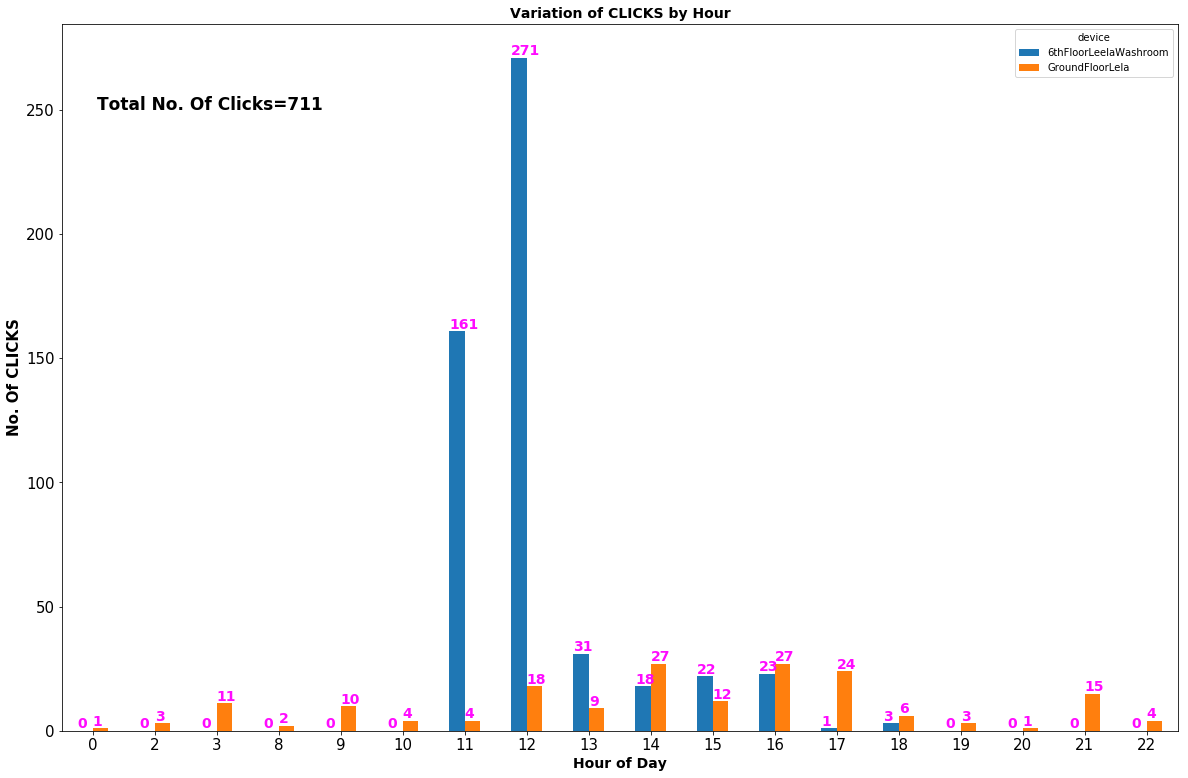

In [39]:
ax5=df3.groupby(['device','click_Hour']).size().unstack(0).plot(figsize=[20,13],kind='bar',legend='side',fontsize=15, rot=0)
ax5.set_xlabel("Hour of Day",fontsize=14, fontweight='bold')
ax5.set_ylabel("No. Of CLICKS",fontsize=15, fontweight='bold')
ax5.set_title('Variation of CLICKS by Hour', fontsize=14, fontweight='bold')
for i in ax5.patches:
    ax5.text(i.get_x(), i.get_height()+1, str(int(i.get_height())),fontsize=14, color='magenta', fontweight='bold', alpha=12)
    
ax5.text(0.06, 250,"Total No. Of Clicks="+str(len(df3)),fontsize=17, fontweight='bold')

plt.savefig("test3.pdf", bbox_inches='tight')


In [34]:
df3.page.value_counts()

Search Company          482
                         96
FeedBack Clicked         44
Company Clicked          17
You are here Clicked     12
redbus                    8
Location Clicked          6
saifpartner               6
dpac                      5
Comming Soon Clicked      4
zipindiqube               4
scripbox                  4
Cafe Clicked              4
hancom                    4
Events Clicked            3
ak                        3
About Button Clicked      3
cleo                      2
enphasethirdfloor         2
enphase2                  1
FireExit Clicked          1
Name: page, dtype: int64